# Lab 2.8: Tree Based Methods

In this case, we will be conduct a simpler exercise with decision trees using previous implementations. In particular, we will make use of several implemented methods in ML libraries s.a. `sklearn` (_that should be good news for you, doesn't it?_). With this, we will try to explore the main characteristics of decision trees, that you will also have to explore in the more theoretical part of the lab (the other exercise, the one on the pdf).

We will begin, as usual, importing the relevant libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode


# ML libraries to construct, use and analyse the trees
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier,plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image  
from sklearn.metrics import mean_squared_error, confusion_matrix
import pydotplus

from sklearn.metrics import mean_squared_error

We will first apply this to a regression dataset so that you see the way the model is constructed for this case 

## Regression Tree

For starters, let us try out a regression tree. To that end, first load the `Hitters.csv` dataset from the `data` 
folder.

In [63]:
hitters  = pd.read_csv("data/Hitters.csv").dropna()


# Print the columns here to check their names
print(hitters.columns)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Hitters.csv'

For this first case, we will only use the variables `Years` and `Hits` for the tree. Our target variable will be `Salary`. Separate them into `X` and `y`

In [5]:
# Separate the independent variables (X) from the dependent one (y - salary)

X = hitters[['Years', 'Hits']]
y = hitters["Salary"]



Construct a _decision tree regressor_ using the `sklearn` function and fit it. To do that, check out the `DecisionTreeRegressor` in sklearn and implement it here.

For reproducibility, fix the `random_state` to `0` and the `max_leaf_nodes` to `3` (make sure you know what this last thing does!)

In [6]:
# Construct the regressor
regressor = DecisionTreeRegressor(random_state=0,max_leaf_nodes=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit it with the .fit method
regressor.fit(X_train, y_train)  # 

DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

Now we will employ some functions engrained in `StringIO` alongside the method `export_graphviz` from the `tree` object in sklearn. This will enable us to visualize the constructed tree.

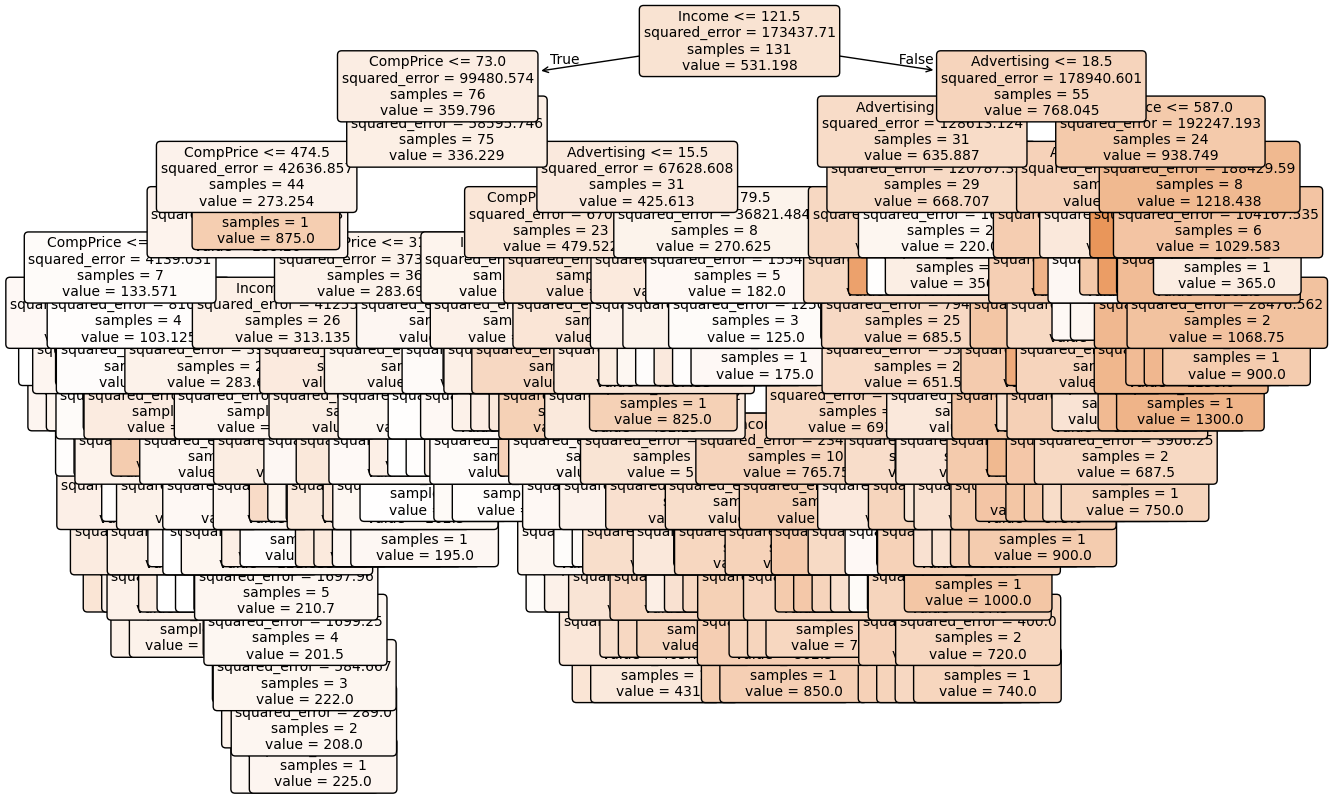

In [62]:
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura si es necesario
plot_tree(regressor, filled=True, feature_names=X.columns, 
          class_names=['Low Salary', 'High Salary'], 
          rounded=True, fontsize=10)
plt.show()

None


> Question: Describe the previous tree. What do you see? Do you think this will work well? Respond **briefly**

Now we will plot the decision regions using the information on the cuts. Add lines wherever needed so that you can see the decision boundaries for the regression tree above

c:\Users\luisc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


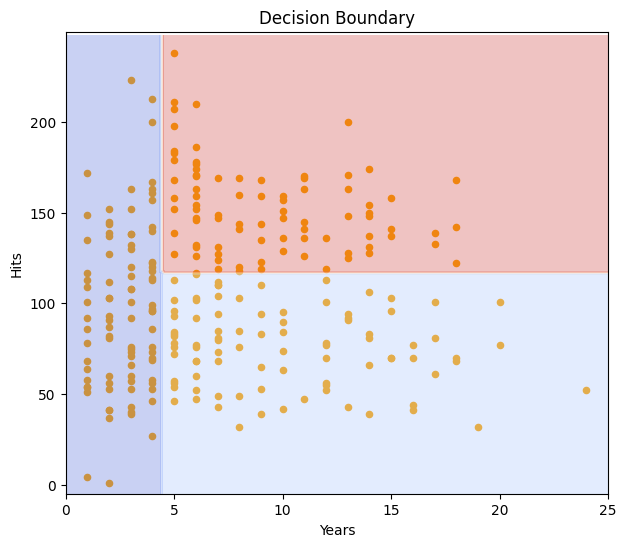

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot
hitters.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0, 25)
plt.ylim(ymin=-5)

# Generate a mesh grid of values spanning the feature space
x_min, x_max = 0, 25
y_min, y_max = hitters['Hits'].max() + 10, hitters['Hits'].min() - 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Assuming you have a trained classifier named `model`
Z = regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.contour(xx, yy, Z, levels=[0.5], colors='black')  # Decision boundary

plt.xlabel('Years')
plt.ylabel('Hits')
plt.title('Decision Boundary')

plt.show()


## Tree Size

Now, for the previous part we limited the growth of the tree so that we recovered a simple (but easily interpretable) tree. Now we will go all-out: we will construct a more exhaustive tree using different variables. For this particular case, let us use **all variables except** `League`, `Division`, `NewLeague` and `Salary` as independent variables to predict, precisely, the `Salary` value. 

In [9]:
# Construct the input variable dataset
X = hitters.drop(columns=['League', 'Division', 'NewLeague', 'Salary',"Player"])

# Print the column names to check
print(X.columns)

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')


We will now perform the train/test split, but we will do it so that the proportion of train and test examples is $50\%$ (that is, train and test consist on $50\%$ of the datapoints).

In [10]:
# Perform the train-test split here. Do it so that the  
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5) # : Fill the NAs, fixing also the random_state to 0 for reproducibility
print(x_test.dtypes)  # Muestra los tipos de datos en X_train


AtBat      int64
Hits       int64
HmRun      int64
Runs       int64
RBI        int64
Walks      int64
Years      int64
CAtBat     int64
CHits      int64
CHmRun     int64
CRuns      int64
CRBI       int64
CWalks     int64
PutOuts    int64
Assists    int64
Errors     int64
dtype: object


Now, train the tree to its fullest extent: put no limits on the growth and see what happens. You can re-use some of the previous `graphviz` code to visualize the tree here. Plot the complete tree.

In [11]:
# Train the tree without limits to its growth (random_state = 0)
unlimited_tree_regressor = DecisionTreeRegressor(random_state=0)
unlimited_tree_regressor.fit(x_train, y_train) 

DecisionTreeRegressor(random_state=0)

Reuse the code you need to plot the tree here

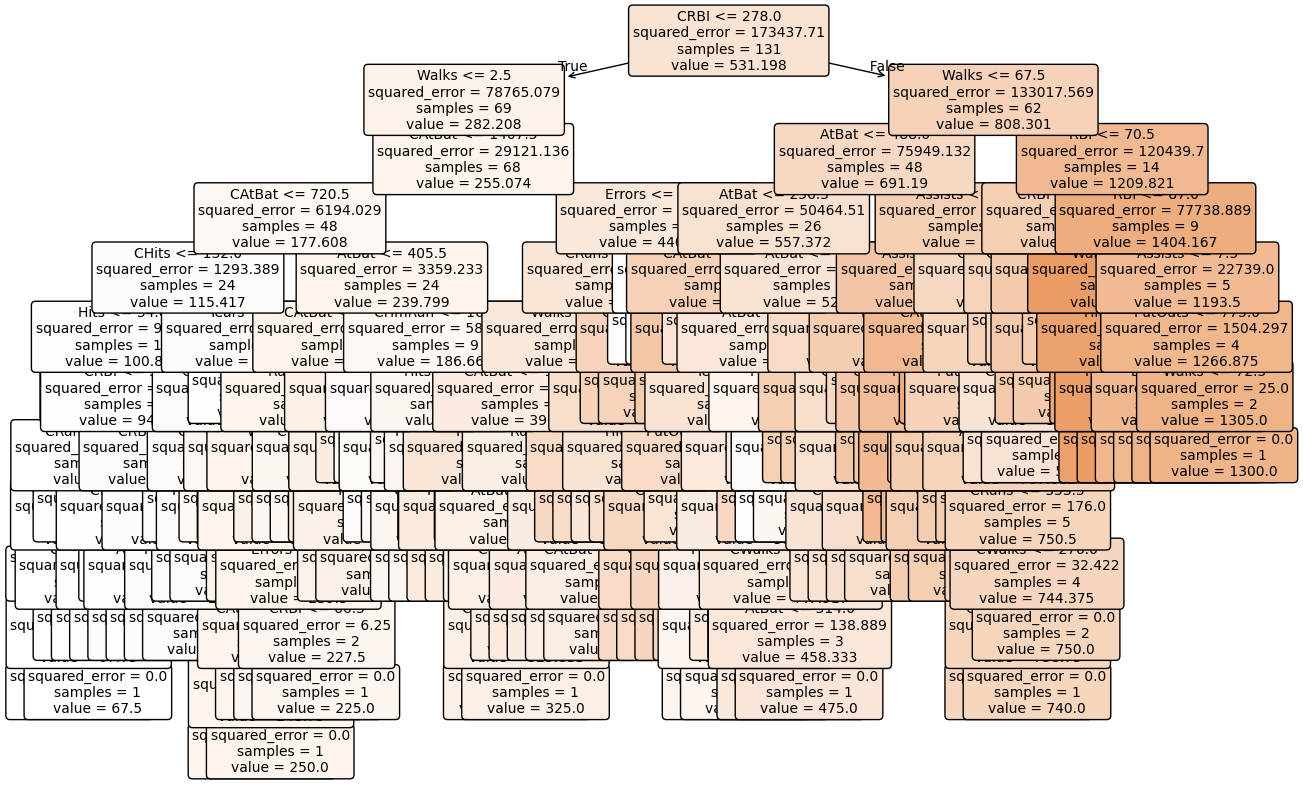

In [12]:
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura si es necesario
plot_tree(unlimited_tree_regressor, filled=True, feature_names=X.columns, 
          class_names=['Low Salary', 'High Salary'], 
          rounded=True, fontsize=10)
plt.show()


> Question: What do you see? What can you say about this tree? Does it have any important properties?

Maybe we went _a bit too far_ with the tree... Let's set up some limitations to see everything better. Try setting the `max_features` to 9, and the `max_depth` to 4. (_It is important you understand what these parameters do! Check out the documentation in the [library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)_)

In [13]:
regressor_2 = DecisionTreeRegressor(random_state=0,max_features=9,max_depth=4) 
regressor_2.fit(x_train, y_train) 

DecisionTreeRegressor(max_depth=4, max_features=9, random_state=0)

Reuse the code you may need to plot the tree here

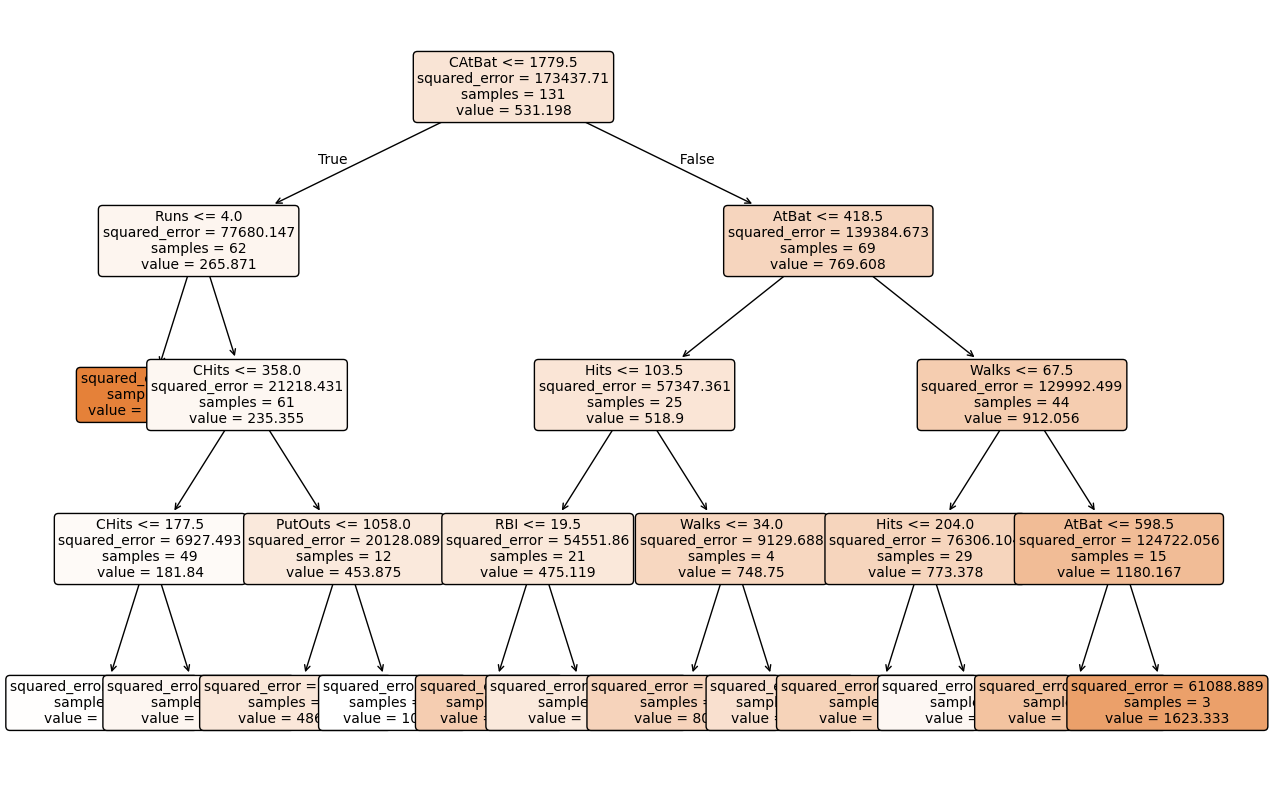

In [14]:
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura si es necesario
plot_tree(regressor_2, filled=True, feature_names=X.columns, 
          class_names=['Low Salary', 'High Salary'], 
          rounded=True, fontsize=10)
plt.show()

Let us see if this tree works well at all... Since we are performing regression, we can obtain the RMSE (we use the Root MSE since it shares the same dimensions of the outputs):

In [15]:
predictions = regressor_2.predict(x_train)

rmse=np.sqrt(mean_squared_error(y_train,predictions))


Now, the question is: how do we know which tree depth to select here? As you may expect, the answer is, as almost always here, performing _cross validation_. In this particular instance we will not conduct exhaustive cross validation. Instead, we will do it in a very simple manner, obtaining *a single tree* for each depth value we want, fitting it to the data and seeing how well does it perform both in train and test  fitted to the data. To do this, do the following:
* Fit a **fixed max depth** (`i`) decision tree regressor using *all `x_train` variables*. Also, *fix the `random state` to 1* for reproducibility.
* Register its train and test RMSEs
* Plot the train and test RMSE curves for each `i` depth  

Make sure that you explore _enough_ depth values. 

394.11650665279024
382.4935973552825
343.3893872554027
361.97863971989705
377.2366479208742
378.2781749197571
394.27000064090106
395.3839301431323
389.346433264363
391.3678432191668
384.09374274652055
378.6828279166945
378.6828279166945
378.6828279166945
378.6828279166945
378.6828279166945
378.6828279166945
378.6828279166945
378.6828279166945


Text(0, 0.5, 'Root Mean Squared Error')

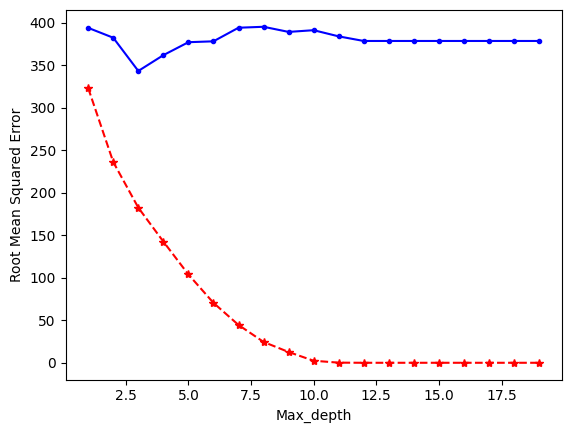

In [16]:
# Lists to store the results
train_rmse = []
test_rmse = []

# Range of depths to be explored
tree_size = np.arange(1,20)

for i in tree_size:
    regressor = DecisionTreeRegressor(random_state=1,max_depth=i) 
    regressor.fit(x_train, y_train)
    predictions_train=regressor.predict(x_train)
    predictions_test=regressor.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,predictions_test))
    rmse_train=np.sqrt(mean_squared_error(y_train,predictions_train))
    print(rmse_test)
    train_rmse.append(rmse_train)
    test_rmse.append(rmse_test)
    # Train the needed tree with the set depth, then measure its RMSE in train and test and store them in the previous lists
    

# Plot the results
plt.plot(tree_size, train_rmse, 'r*--')
plt.plot(tree_size, test_rmse, 'b.-')
plt.xlabel('Max_depth')
plt.ylabel('Root Mean Squared Error')




> Question: What do you see here? What depth value would you select?

encontramos que para profundidades pequeñas tanto train como test vemos que tienen un alto valor de rmse por lo que seran muy simples (underfitting)

yo selecccionaria un valor de i=13 por ejemplo pues el arbol sera mas sencillo y a partir de esta profundidad vemos que el rmse de train es practicamente 0 y el de test se queda fijo en un mismo valor

Since we are not really making CV, we do not have multiple values for the train and test RMSE for each tree. Therefore, we *do not* have errorbars in the previous plot. That should raise some suspicions from your part. 

> Question: What happens if we change the `random_state` value? Are the previous results robust?




To answer the previous question you can try out code in the next cell. Feel free to try whatever you think is needed here.

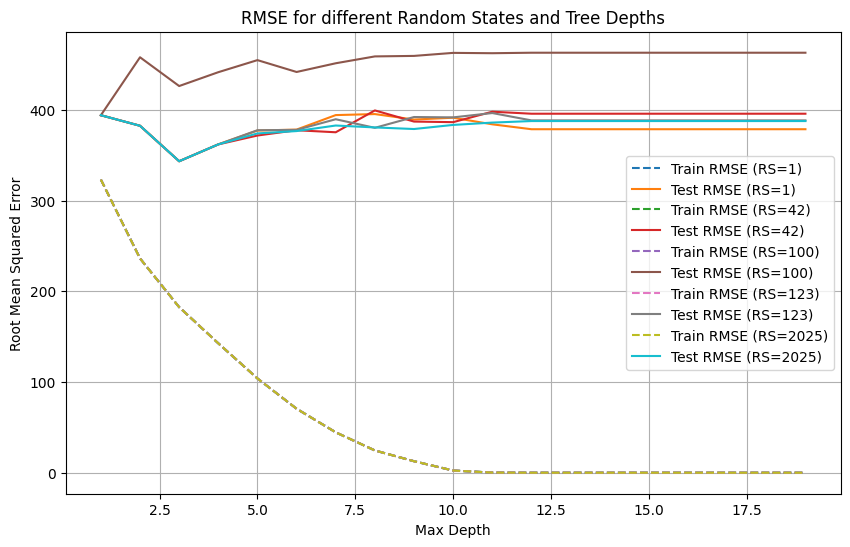

In [17]:

# Lists to store the results
train_rmse = []
test_rmse = []

# Range of depths to be explored
tree_size = np.arange(1, 20)

# Try different random_state values
random_states = [1, 42, 100, 123, 2025]

# Loop over different random_state values
for random_state in random_states:
    train_rmse_temp = []
    test_rmse_temp = []

    for i in tree_size:
        regressor = DecisionTreeRegressor(random_state=random_state, max_depth=i)
        regressor.fit(x_train, y_train)
        
        # Predictions for train and test
        predictions_train = regressor.predict(x_train)
        predictions_test = regressor.predict(x_test)
        
        # Calculate RMSE
        rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
        
        train_rmse_temp.append(rmse_train)
        test_rmse_temp.append(rmse_test)
    
    # Store results for each random_state
    train_rmse.append(train_rmse_temp)
    test_rmse.append(test_rmse_temp)

# Convert lists to numpy arrays for easy handling
train_rmse = np.array(train_rmse)
test_rmse = np.array(test_rmse)

# Plot the results for each random_state
plt.figure(figsize=(10, 6))

# Plot for each random_state value
for i, random_state in enumerate(random_states):
    plt.plot(tree_size, train_rmse[i], '--', label=f'Train RMSE (RS={random_state})')
    plt.plot(tree_size, test_rmse[i], '-', label=f'Test RMSE (RS={random_state})')

# Labeling the axes and title
plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE for different Random States and Tree Depths')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In order to get more acquainted with the results, check out what happens if you include less  `x_train` features. To do so, change what you need from the previous block of code and put it in the next block here.
> Question: Do you see any important changes? How do you explain this? 


ahora el modelo es mas robusto pues los cambios dependiendo del random_state son menores, pero vemos un aumento en el rmse por lo que el modelo podria sobreajustarse o subajustarse llevando a un peor rendimiento

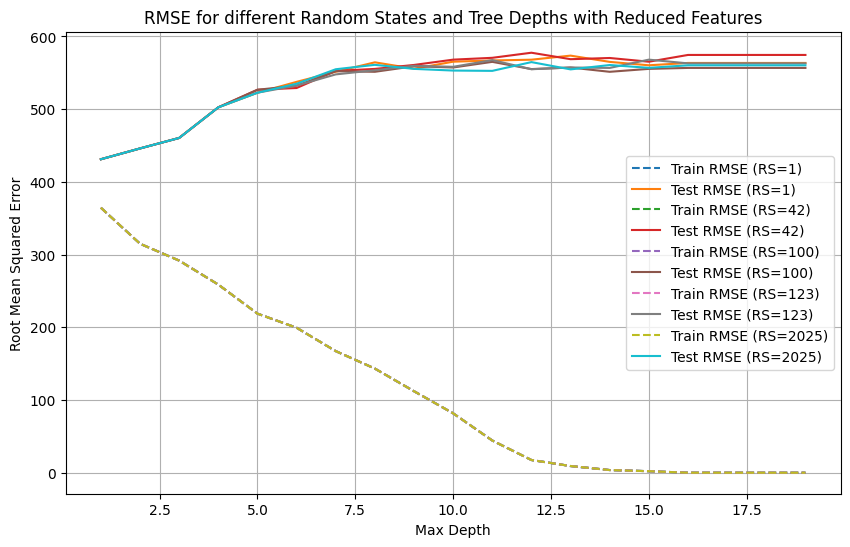

In [18]:

x_train_reduced = x_train.iloc[:, :3]  # Select only the first 3 features, or you can choose different features
x_test_reduced = x_test.iloc[:, :3]    # Select corresponding features for the test set

# Lists to store the results
train_rmse = []
test_rmse = []

# Range of depths to be explored
tree_size = np.arange(1, 20)

# Try different random_state values
random_states = [1, 42, 100, 123, 2025]

# Loop over different random_state values
for random_state in random_states:
    train_rmse_temp = []
    test_rmse_temp = []

    for i in tree_size:
        regressor = DecisionTreeRegressor(random_state=random_state, max_depth=i)
        regressor.fit(x_train_reduced, y_train)  # Train using reduced features
        
        # Predictions for train and test
        predictions_train = regressor.predict(x_train_reduced)
        predictions_test = regressor.predict(x_test_reduced)
        
        # Calculate RMSE
        rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
        
        train_rmse_temp.append(rmse_train)
        test_rmse_temp.append(rmse_test)
    
    # Store results for each random_state
    train_rmse.append(train_rmse_temp)
    test_rmse.append(test_rmse_temp)

# Convert lists to numpy arrays for easy handling
train_rmse = np.array(train_rmse)
test_rmse = np.array(test_rmse)

# Plot the results for each random_state
plt.figure(figsize=(10, 6))

# Plot for each random_state value
for i, random_state in enumerate(random_states):
    plt.plot(tree_size, train_rmse[i], '--', label=f'Train RMSE (RS={random_state})')
    plt.plot(tree_size, test_rmse[i], '-', label=f'Test RMSE (RS={random_state})')

# Labeling the axes and title
plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE for different Random States and Tree Depths with Reduced Features')
plt.legend(loc='best')
plt.grid(True)
plt.show()


## Classification Tree

In order to complete this practical exercises with trees, we will also try out some classification trees to later do ensembles. Let us see how this works. 

First, load the `Carseat.csv` dataset from `data` (make sure to remove the NAs, as before)

In [ ]:
# Load the dataset (remove the NAs)
carseats = pd.read_csv("data/Carseat.csv").dropna()

Make it so that we have a new binary variable called `high`. This variable should be `1` when `sales` are over 8, and `0` otherwise.

In [20]:
carseats['high'] = (carseats['Sales'] > 8).astype(int)


Convert the remaining variables to make them usable here

The variables `ShelveLoc`, `Urban` and `US` need to be converted to categorical variables to be correctly used. To that end, I suggest you use `pd.factorize` (although feel free to do as you will here...)

In [21]:
categorical_cols = ['ShelveLoc', 'Urban', 'US']
for col in categorical_cols:
    carseats[col] = pd.factorize(carseats[col])[0]  


Now, we will employ all variables to predict the `high` value (except `Sales` and `high`, for obvious reasons). Note that we have essentially converted a _regression_ problem into a _binary classification_ one.

In [ ]:
X =  carseats.drop(columns=["high","Sales"])
y =  carseats["high"]

# : Performn the train/test split with again 50% data for train and 50% for test 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.5, random_state = 0)



Construct a decision tree classifier. To control for the depth, we will fix it to a *maximum depth of 6*. Use as impurity criteria the **Gini index**.

In [23]:
carseats_classifier = DecisionTreeClassifier(random_state=0, max_depth=6,criterion="gini")  # TODO: Fill the NAs. Fix the random_state to 0

# Train the model with .fit
carseats_classifier.fit(X_train, y_train) 
print(X_train)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
138        125     103           12         371    109          2   44   
236        141      34           16         361    108          2   69   
219        116      79           19         359    116          1   58   
274        135      93            2          67    119          2   34   
278        114     113            2         129    151          1   40   
..         ...     ...          ...         ...    ...        ...  ...   
323        107     105           18         428    103          2   34   
192        108      26            0         408     93          2   56   
117        145      53            0         507    119          2   41   
47         126      98            0         173    108          0   55   
172        104     102           13         123    110          1   35   

     Education  Urban  US  
138         10      0   0  
236         10      0   0  
219         17      0   0  

Plot the tree (again, reuse whatever you may need here)

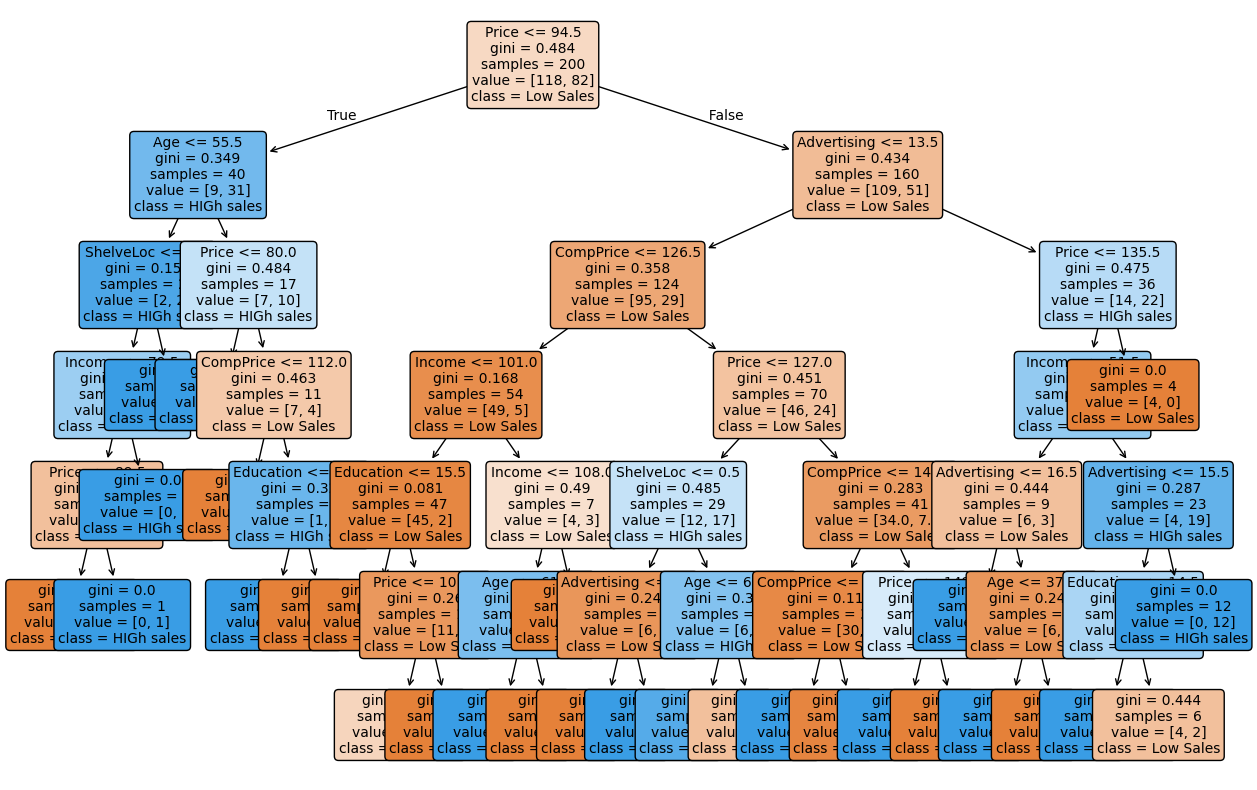

In [24]:
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura si es necesario
plot_tree(carseats_classifier, filled=True, feature_names=X.columns, 
          class_names=['Low Sales', 'HIGh sales'], 
          rounded=True, fontsize=10)
plt.show()

Let us now assess the quality of the tree. To that end, **represent the confusion matrix** for the test data

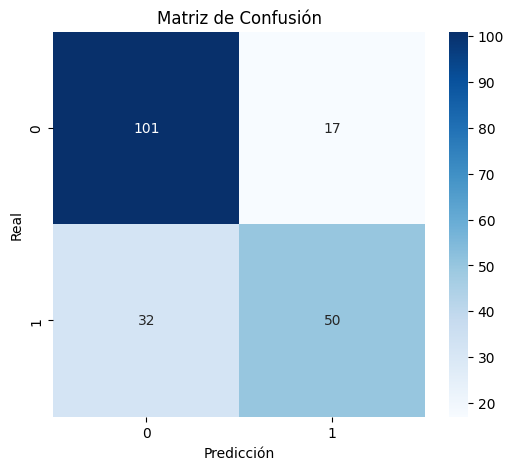

In [25]:
import seaborn as sns

y_pred = carseats_classifier.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión con un mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

> Questions: 
> * What is the **precision** of this tree?

50/(50 + 17) = 0.74
> * Do you consider the dataset balanced?

no porque los true negatives son el doble que los true positives


# Ensembles

Now we will try out some of the ensemble methods from class. Remember there is an stochastic component embedded in these for the most part, so we may not recover exactly the same results twice depending on how you implement things.

## Bagging

The decision tree models mentioned above usually suffers from high variance. **B**ootstrap **agg**regation, or **bagging** usually helps with this issue. To do bagging here, we will do it both by hand and by employing the sklearn function.

First, let's go with the *by-hand* implementation

In [26]:
# Set the bagging parameters
n_estimators = 10  # Number of decision trees in the ensemble
max_samples = 0.8  # Proportion of samples to be used for each bootstrap sample

# Store the predictions
predictions = []
n_samples = X_train.shape[0]

for _ in range(n_estimators):

    # Create a bootstrap sample
    sample_indices = np.random.choice(n_samples, size=int(max_samples * n_samples), replace=True)
    X_bootstrap = X_train.iloc[sample_indices]
    y_bootstrap = y_train.iloc[sample_indices]

    
    # Train a decision tree classifier on the bootstrap sample
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_bootstrap, y_bootstrap)
    
    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test)
    predictions.append(y_pred)

# Combine predictions
# For classification, you can use majority voting
predictions=np.array(predictions)
majority_vote = []
for i in range(predictions.shape[1]):  # Recorremos las muestras de X_test
    majority_vote.append(mode(predictions, axis=0).mode[0])
majority_vote=np.array(majority_vote)
print(f"Shape of majority_vote: {majority_vote.shape}")
print(f"Shape of y_test: {y_test.shape}")
# For regression, you can use averaging
# combined_predictions = np.(predictions, axis=0)  # For classification, use np.mean for voting
print("Final Bagging Classifier Predictions:", majority_vote)



Shape of majority_vote: (200,)
Shape of y_test: (200,)
Final Bagging Classifier Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Print the confusion matrix

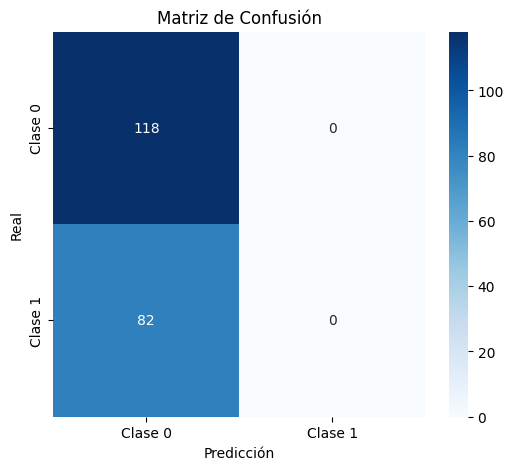

In [27]:
cm = confusion_matrix(y_test, majority_vote)

# Visualiza la matriz de confusión usando un mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Let's see how this is done in `sklearn`... Fit it and show the confusion matrix

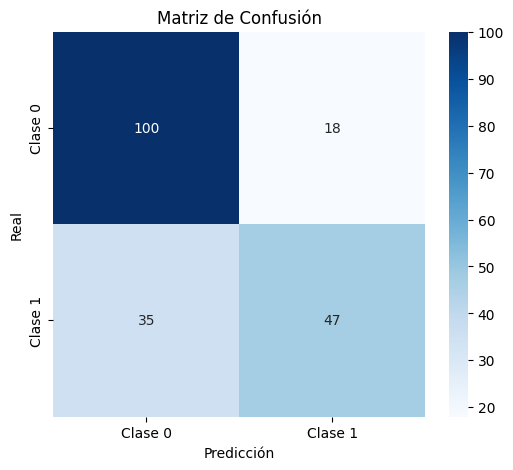

In [32]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=10,max_samples=0.8,random_state=0)

#: Create a BaggingClassifier (fix random_state to 0)

#: Train it with the training data
bagging.fit(X_train, y_train)

#: Obtain the predictions
bagging_pred = bagging.predict(X_test)

#  Print the confusion matrix (use the confusion_matrix function)
cm = confusion_matrix(y_test, bagging_pred)

# Visualizar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

We will use the `sklearn` implementation to study the variable importance. *Make sure you understand how this is done!*

<Axes: >

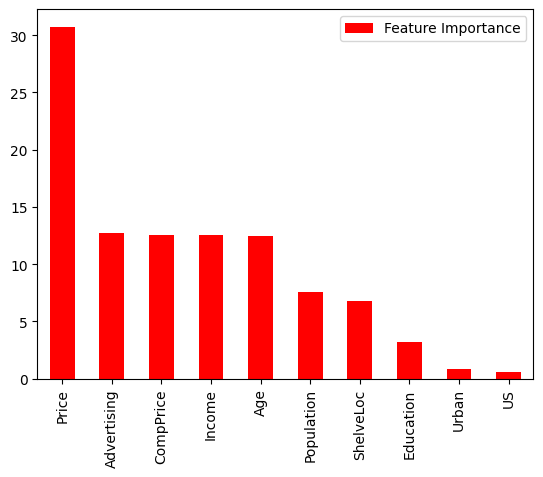

In [34]:
feature_importances = pd.DataFrame(
    {'Feature Importance': sum(tree.feature_importances_ for tree in bagging.estimators_) / len(bagging.estimators_) * 100},
    index=X_train.columns
)

# Graficar la importancia de las características
feature_importances.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

> Question: What do you see here?

vemos la importancia relativa en % de cada caracteristica en la prediccion del modelo

## Random Forest

We will also do this in the RF case. First, we will implement it by hand. Feel free to use the previous code and modify it as you may see fit to do RF here!

In [49]:
# Set the bagging parameters
n_estimators = 10  # Number of decision trees in the ensemble
max_samples = 0.8  # Proportion of samples to be used for each bootstrap sample
max_features=0.8

# Store the predictions
predictions = []
n_samples,n_features = X_train.shape

for _ in range(n_estimators):

    # Create a bootstrap sample
    sample_indices = np.random.choice(n_samples, size=int(max_samples * n_samples), replace=True)
    X_bootstrap = X_train.iloc[sample_indices]
    y_bootstrap = y_train.iloc[sample_indices]

    # Seleccionar un subconjunto aleatorio de características
    feature_indices = np.random.choice(n_features, size=int(max_features * n_features), replace=False)
    X_bootstrap = X_bootstrap.iloc[:, feature_indices] if isinstance(X_train, pd.DataFrame) else X_bootstrap[:, feature_indices]
    X_test_subset = X_test.iloc[:, feature_indices] if isinstance(X_train, pd.DataFrame) else X_test[:, feature_indices]


    
    # Train a decision tree classifier on the bootstrap sample
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_bootstrap, y_bootstrap)
    
    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test_subset)
    predictions.append(y_pred)

# Combine predictions
# For classification, you can use majority voting
predictions=np.array(predictions)
majority_vote = []
for i in range(predictions.shape[1]):  # Recorremos las muestras de X_test
    majority_vote.append(mode(predictions, axis=0).mode[0])
majority_vote=np.array(majority_vote)
print(f"Shape of majority_vote: {majority_vote.shape}")
print(f"Shape of y_test: {y_test.shape}")
# For regression, you can use averaging
# combined_predictions = np.(predictions, axis=0)  # For classification, use np.mean for voting
print("Final Bagging Classifier Predictions:", majority_vote)



Shape of majority_vote: (200,)
Shape of y_test: (200,)
Final Bagging Classifier Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Print the confusion matrix

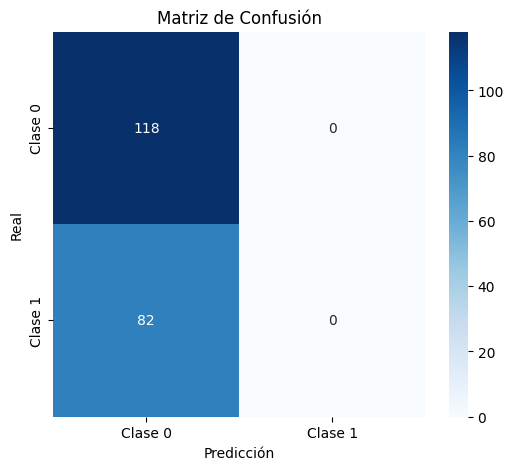

In [51]:
cm = confusion_matrix(y_test, majority_vote)

# Visualiza la matriz de confusión usando un mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Let us do it again with `sklearn` so you see the differences... Show the confusion matrix. In this last part there may be some differences with your run, which are due to the randomness of the classifiers constructed. Do not worry too much about it here.

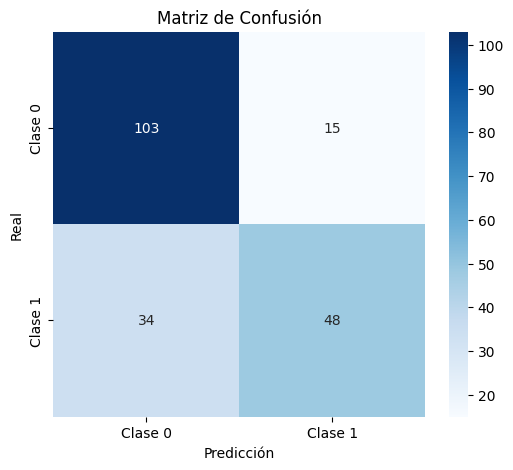

In [55]:
# : Construct the RF classifier with RandomForestClassifier. Fix the random_state to 0, n_estimators to 10 and max_features to 0.8
rf = RandomForestClassifier(random_state=0,n_estimators=10,max_features=0.8)

# : Train it
rf.fit(X_train, y_train)

# : Predict the test values
rf_pred= rf.predict(X_test)

# : Obtain the confusion matrix and print it
cm = confusion_matrix(y_test, rf_pred)

# Visualizar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Using again the `sklearn` implementation, we will study the feature importance

<Axes: >

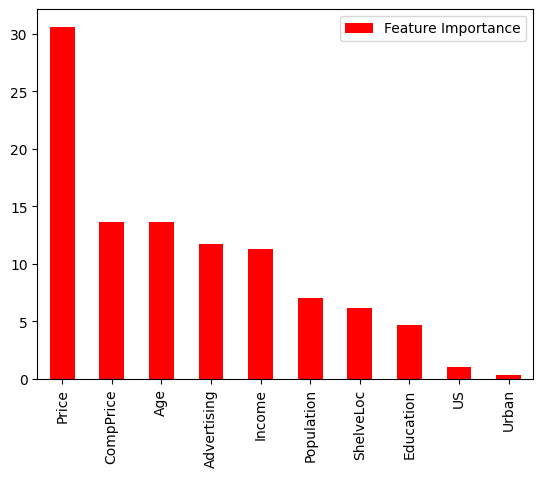

In [42]:
rf_featureImportance= pd.DataFrame({'Feature Importance':rf.feature_importances_*100}, index= X.columns)
rf_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

> Question: Given the models thus far (simple tree, bagging and RF), which one would you choose and why?

## Extra: Boosting

In order to fully complete our review of the ensemble methods from class, we are missing the **Boosting method**. In order to keep matters simple, we will implement it here with `sklearn` so that you get to see what it looks like...

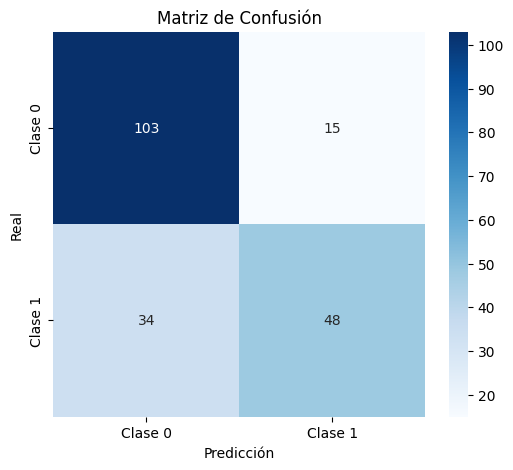

In [56]:
# Import the model
from sklearn.ensemble import GradientBoostingClassifier

# Create the Boosting model
gb= GradientBoostingClassifier(n_estimators = 5000, random_state = 1, max_depth = 2)

# If you want to try it out, you can change reuse most of previous codes to run it here!
gb.fit(X_train, y_train)

# : Predict the test values
gb_pred= rf.predict(X_test)

# : Obtain the confusion matrix and print it
cm = confusion_matrix(y_test, gb_pred)

# Visualizar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

The results are pretty good! Keep in mind that this is achieved with super weak learners s.a. trees with depth 2. It is quite fast, and super easy to use with `sklearn`. We can also study the variable importance in this case.

<Axes: >

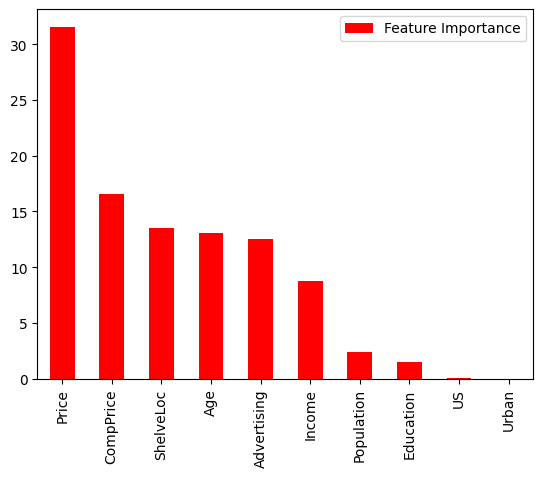

In [57]:
gb_featureimportance= pd.DataFrame({'Feature Importance': gb.feature_importances_*100}, index= X.columns)
gb_featureimportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

If you want to see how this can be implemented easily by hand, you can use the following code. We are using an implementation that follows a description of Boosting mode similar to the one given in the ISLR book

In [61]:
# Initialize the parameters
n_estimators = 1000  # Number of decision trees in the ensemble
learning_rate = 0.1  # Learning rate for each decision tree

# Initialize the weights for the training samples
sample_weights = np.ones(len(X_train)) / len(X_train)

# Train decision trees with weighted samples and make predictions
predictions = []
for _ in range(n_estimators):

    # Train a decision tree classifier on the weighted training samples
    decision_tree = DecisionTreeClassifier(max_depth = 2)
    decision_tree.fit(X_train, y_train, sample_weight=sample_weights)

    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test)
    predictions.append(y_pred)

    # Calculate error
    incorrect = (y_pred != y_test).astype(int)
    error = np.sum(sample_weights * incorrect) / np.sum(sample_weights)

    # Update sample weights
    alpha = learning_rate * np.log((1 - error) / error)
    sample_weights *= np.exp(alpha * incorrect)

# Combine predictions
# For classification, you can use weighted voting
combined_predictions = np.zeros(len(X_test))
for prediction in predictions:
    combined_predictions += prediction

# Evaluate the performance of the boosting ensemble
# : This can be done with the previous codes you had already. Reuse them here to see the result!
print(combined_predictions)


[   0. 1000. 1000.    0. 1000. 1000. 1000.    0.    0.    0.    0.    0.
    0. 1000.    0.    0. 1000.    0.    0.    0.    0.    0.    0.    0.
    0. 1000.    0.    0.    0.    0.    0. 1000. 1000. 1000.    0. 1000.
    0.    0.    0.    0.    0.    0.    0. 1000.    0.    0.    0. 1000.
    0. 1000.    0.    0.    0. 1000.    0.    0.    0.    0.    0.    0.
    0. 1000.    0.    0.    0.    0.    0. 1000.    0. 1000. 1000.    0.
 1000.    0.    0.    0.    0.    0.    0. 1000.    0.    0.    0.    0.
    0. 1000.    0.    0. 1000.    0. 1000.    0. 1000.    0.    0.    0.
 1000.    0.    0. 1000.    0.    0.    0. 1000.    0. 1000.    0. 1000.
    0. 1000.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0. 1000.    0.    0.    0.
 1000.    0.    0.    0.    0. 1000.    0.    0.    0. 1000. 1000.    0.
    0.    0.    0. 1000.    0.    0.    0.    0. 1000.    0. 1000.    0.
    0.    0.    0. 1000.    0.    0.    0.    0.   